## Student: Deng, Zixuan (V00971633)
# Problem 1. Multi-dimensional coat [30 points]

The good ol’ MNIST dataset is nowadays deemed too boring and too easy. Thus a replacement was
born—the Fashion-MNIST. This dataset throws away the digits and instead uses shirts, sandals and
other fashion items. Let’s play with it.

Import package

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

## 1.1 Dataset [5 points]

Get the Fashion-MNIST dataset from https://github.com/zalandore search/fashion-mnist. For this assignment, you can get either the training or the test data.
As either dataset is quite large, downsample it to 5,000 elements. Make sure that each class
contains 500 items.
 

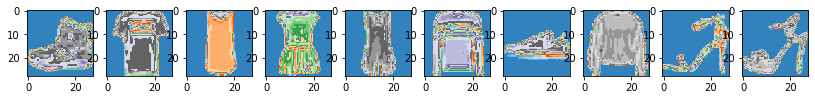

In [2]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check if the images are clothes. 

fig = plt.figure(figsize = (14,14))
for i in range(10):
    fig.add_subplot(1,10,i+1)
    plt.imshow(X_train[i], cmap='tab20c')
  # plt.show()

# X_train = X_train.reshape(X_train.shape[0], -1) / 255. 
# X_test = X_test.reshape(X_test.shape[0], -1) / 255.  
# y_train = np_utils.to_categorical(y_train, num_classes=10)
# y_test = np_utils.to_categorical(y_test, num_classes=10)


In [3]:

(unique, counts) = np.unique(y_train, return_counts=True)
print(unique)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [4]:
print(X_train.shape)
print(y_train.shape)
y_train

(60000, 28, 28)
(60000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
# Get each class contains 500 items
result_0_index = (y_train == 0)
result_0_y = (y_train[result_0_index])[:500]
result_0_X = (X_train[result_0_index])[:500]
print(result_0_X)
print(result_0_X.shape)

result_1_index = (y_train == 1)
result_1_y = y_train[result_1_index][:500]
result_1_X = (X_train[result_1_index])[:500]

result_2_index = (y_train == 2)
result_2_y = (y_train[result_2_index])[:500]
result_2_X = (X_train[result_2_index])[:500]

result_3_index = (y_train == 3)
result_3_y = (y_train[result_3_index])[:500]
result_3_X = (X_train[result_3_index])[:500]

result_4_index = (y_train == 4)
result_4_y = (y_train[result_4_index])[:500]
result_4_X = (X_train[result_4_index])[:500]

result_5_index = (y_train == 5)
result_5_y = (y_train[result_5_index])[:500]
result_5_X = (X_train[result_5_index])[:500]

result_6_index = (y_train == 6)
result_6_y = (y_train[result_6_index])[:500]
result_6_X = (X_train[result_6_index])[:500]

result_7_index = (y_train == 7)
result_7_y = (y_train[result_7_index])[:500]
result_7_X = (X_train[result_7_index])[:500]

result_8_index = (y_train == 8)
result_8_y = (y_train[result_8_index])[:500]
result_8_X = (X_train[result_8_index])[:500]

result_9_index = (y_train == 9)
result_9_y = (y_train[result_9_index])[:500]
result_9_X = (X_train[result_9_index])[:500]
print(result_9_y)

# the new X has downsample to 5000 elements
new_X = np.concatenate((result_0_X, result_1_X, result_2_X, result_3_X, result_4_X, result_5_X, result_6_X, result_7_X, result_8_X, result_9_X), axis=0)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 1 0 0]
  [0 0 1 ... 2 0 0]
  [0 0 2 ... 1 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 0 ... 0 0 0]]]
(500, 28, 28)
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9

In [6]:
new_y = np.concatenate((result_0_y, result_1_y, result_2_y, result_3_y, result_4_y, result_5_y, result_6_y, result_7_y, result_8_y, result_9_y), axis=0)
# check the shape of new X sample
print(new_X.shape)
print(new_y.shape)

(5000, 28, 28)
(5000,)


## 1.2 Dimensionality [10 points] 
Run PCA on this dataset. Plot the top 5 components. What
are they standing for, if anything? How many components do you need to explain 80% of the variance? Let this number be $d$. Pick some examples (say, 3 of then) randomly from
the dataset, and show the difference between their projection to d-dimensional space and the
original image.

In [7]:

# to fit the dim require in sklearn pca, need to transfer the dim
X = new_X.reshape(new_X.shape[0], -1) / 255. 
y = np_utils.to_categorical(new_y, num_classes=10)

pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

print(pca.explained_variance_ratio_)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

# check the interpretable of the first 5 components. 
sum(pca.explained_variance_ratio_)

[0.2894057  0.17891144 0.05921906 0.04999355 0.04025787]
original shape:    (5000, 784)
transformed shape: (5000, 5)


0.6177876198469371

In [8]:
approximation_1 = pca.inverse_transform(X_pca)

In [9]:
pca.components_[0, :]

array([ 1.02615867e-06,  4.65086373e-06,  1.84741721e-05,  7.65495997e-05,
        1.23644712e-04,  3.75417460e-04,  6.32535774e-04,  1.54026193e-03,
        3.83027538e-03,  7.58726401e-03,  1.45296419e-02,  2.20215713e-02,
        2.67678318e-02,  2.64900049e-02,  2.61704346e-02,  2.80220785e-02,
        2.60234049e-02,  1.88634456e-02,  1.13128393e-02,  5.59181319e-03,
        2.19786288e-03,  8.81452172e-04,  3.96193381e-04,  1.92223435e-04,
        1.32424346e-04,  5.75934623e-05,  1.98372726e-05,  8.50562214e-06,
        1.94246374e-05,  3.75519808e-05,  3.13056784e-05,  2.67927252e-04,
        5.90065647e-04,  1.51209640e-03,  5.50358093e-03,  1.40490044e-02,
        2.53104737e-02,  3.71010477e-02,  4.76431574e-02,  5.85610675e-02,
        6.31077099e-02,  5.90391183e-02,  5.75957228e-02,  6.23445524e-02,
        6.25883738e-02,  5.33431233e-02,  4.31538179e-02,  3.11375004e-02,
        1.86670059e-02,  8.37182827e-03,  2.61972447e-03,  8.53035312e-04,
        6.33237900e-04,  

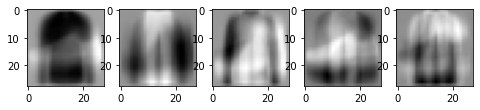

In [10]:
# for i in range(5):
#     fig, axarr = plt.subplots(1, 5)
#     plt.imshow(pca.components_[i, :].reshape(28, 28), cmap='gray_r')
#     plt.show()
fig = plt.figure(figsize = (8,8))
fig.add_subplot(1,5, 1)
plt.imshow(pca.components_[0, :].reshape(28, 28), cmap='gray_r')
fig.add_subplot(1,5, 2)
plt.imshow(pca.components_[1, :].reshape(28, 28), cmap='gray_r')
fig.add_subplot(1,5, 3)
plt.imshow(pca.components_[2, :].reshape(28, 28), cmap='gray_r')
fig.add_subplot(1,5, 4)
plt.imshow(pca.components_[3, :].reshape(28, 28), cmap='gray_r')
fig.add_subplot(1,5, 5)
plt.imshow(pca.components_[4, :].reshape(28, 28), cmap='gray_r')

plt.show()

In [11]:
#  explain 80% of the variance
pca = PCA(.8)
eighty_data = pca.fit_transform(X)
# check # of components require
print(pca.n_components_)
approximation_2 = pca.inverse_transform(eighty_data)

24


In [12]:
sum(pca.explained_variance_ratio_)

0.8034722021053144

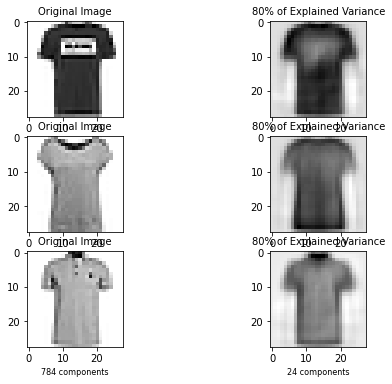

In [13]:
# I have select random 3 sample from the dataset and show the difference between 
# projection to 24-dimensional space adn the original image.


plt.figure(figsize=(8,6));

# Original Image
plt.subplot(3, 2, 1);
plt.imshow(X[0].reshape(28, 28), cmap='gray_r');
plt.xlabel('784 components', fontsize = 8)
plt.title('Original Image', fontsize = 10);

# 24 principal components
plt.subplot(3, 2, 2);
plt.imshow(approximation_2[0].reshape(28,28), cmap='gray_r');
plt.xlabel('24 components', fontsize = 8)
plt.title('80% of Explained Variance', fontsize = 10);


plt.subplot(3, 2, 3);
plt.imshow(X[100].reshape(28, 28), cmap='gray_r');
plt.xlabel('784 components', fontsize = 8)
plt.title('Original Image', fontsize = 10);

plt.subplot(3, 2, 4);
plt.imshow(approximation_2[100].reshape(28,28), cmap='gray_r');
plt.xlabel('24 components', fontsize = 8)
plt.title('80% of Explained Variance', fontsize = 10);


plt.subplot(3, 2, 5);
plt.imshow(X[25].reshape(28, 28), cmap='gray_r');
plt.xlabel('784 components', fontsize = 8)
plt.title('Original Image', fontsize = 10);

plt.subplot(3, 2, 6);
plt.imshow(approximation_2[25].reshape(28,28), cmap='gray_r');
plt.xlabel('24 components', fontsize = 8)
plt.title('80% of Explained Variance', fontsize = 10);


plt.show()

### Short discussion


The top 5 components are the top 5 principal components that have largest possible variance. Those 5 principal components contain the most information for the dataset. 

If I need to explain 80% of the variance, 24 components are reuqired. 

And from the plots of projection to 24-dimensional space and the original image, I find as the percentage of variance explained approaches to 100%, the images are more close to the original image. 

## 1.3 Plot [5 points] 
Now select the two topmost principal components. Use them to plot your dataset as a 2D scatterplot. Use the label vectors to colour different classes on the plot as well.
Would you be able to distinguish classes without knowing the colours in advance?



In [14]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [15]:
X_pca[0]
new_y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [16]:
X = pd.DataFrame(data = X_pca)
X['class'] = new_y
X.head()

,0,1,class
0,5.541853,-1.690965,0
1,-2.758798,-4.405103,0
2,3.259555,-4.643177,0
3,3.916379,-3.334183,0
4,5.107013,-3.247559,0


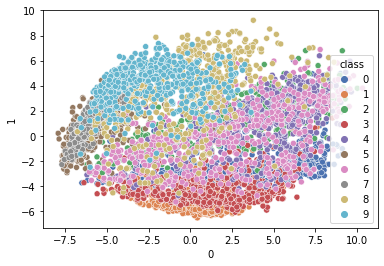

In [17]:
sns.scatterplot(data = X, x = X[0], y =X[1] , hue='class', palette="deep")

### short discussion

**Would you be able to distinguish classes without knowing the colours in advance?**

---


It's hard to distingush classes without knowing the colours in advance. Those points are mixed together. 

## 1.4 SNE [10 points] 
Now run t-SNE with parameters of your choice on this dataset. Again, plot the result of t-SNE as a scatterplot, and use the label vectors to colour different classes. Can
you distinguish classes now? Is this plot more informative than the PCA-based one?

In [18]:
# redefine X
X = new_X.reshape(new_X.shape[0], -1) / 255. 
X.shape

(5000, 784)

In [19]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=50, n_iter=800).fit_transform(X)

In [20]:
# Check the sne result
X_embedded

array([[ 48.891247 ,  19.931795 ],
       [  2.4873297,  15.287527 ],
       [ 14.282702 ,  24.827372 ],
       ...,
       [-42.214993 ,   7.6996703],
       [-44.666737 ,  13.650316 ],
       [-41.67231  ,   6.7226605]], dtype=float32)

In [21]:
sne_data = pd.DataFrame(data = X_embedded)
sne_data['class'] = new_y
sne_data.head()

,0,1,class
0,48.891247,19.931795,0
1,2.487330,15.287527,0
2,14.282702,24.827372,0
3,39.590820,18.846830,0
4,41.898540,19.608908,0


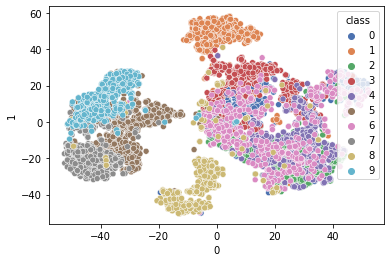

In [22]:
# visualization data. 
sns.scatterplot(data = sne_data, x = sne_data[0], y =sne_data[1] , hue='class', palette="deep")

### short discussion


From the plot of result t-SNE, I find the points can be better distinguished compare with PCA. Even without know the label, some points can be identified as the same class. 

Compare between PCA adn t-SNE: 
Both PCA and t-SNE can do dimension reduction. 
t-SNE is slower than PCA, and is very sensitive to hyperparameters. When doing visualization and clustering, t-SNE performs better than PCA.

# Reference: 
For PCA part code, I have referred some of 
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

and write my own code. 

For t-SNE part, I have referred 
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

To have better understanding of PCA and t-SNE, I have also read https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b


Have fun with colormaps in Matplotlib. : )))
https://matplotlib.org/stable/tutorials/colors/colormaps.html
